<a href="https://www.kaggle.com/code/kansalritu/semantic-segmentation?scriptVersionId=193083151" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [102]:
import tensorflow as tf
import os
import numpy as np
import random
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [3]:
import zipfile
TRAIN_ZIP = '/kaggle/input/data-science-bowl-2018/stage1_train.zip'
TEST_ZIP = '/kaggle/input/data-science-bowl-2018/stage1_test.zip'
# Directory where to extract
TRAIN_PATH = '/kaggle/working/stage1_train/'
TEST_PATH = '/kaggle/working/stage1_test/'

# Unzip the train data
with zipfile.ZipFile(TRAIN_ZIP, 'r') as zip_ref:
    zip_ref.extractall(TRAIN_PATH)

# Unzip the test data
with zipfile.ZipFile(TEST_ZIP, 'r') as zip_ref:
    zip_ref.extractall(TEST_PATH)

print("Extraction complete!")

Extraction complete!


In [101]:
train_ids = next(os.walk(TRAIN_PATH))[1] #gives the folder names
test_ids = next(os.walk(TEST_PATH))[1]
# test_ids

In [5]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [6]:
# path = TRAIN_PATH + train_ids[0]

# # path
# img = imread(path + '/images/' + train_ids[0] + '.png')[:,:,:IMG_CHANNELS]

# imshow(img)
# min_val = img.min()
# max_val = img.max()

# plt.show()
# img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
# # After resizing, ensure the data is in uint8 format and the range [0, 255]
# min_val1 = img.min()
# max_val1 = img.max()

# print(img.dtype)
# if img.dtype != np.uint8:
#     img = np.clip(img, 0, 255)  # Clip values
#     img = img.astype(np.uint8)  # Convert to uint8

# imshow(img)
# plt.show()
# print(min_val, min_val1)
# print(max_val, max_val1)

In [7]:
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [8]:
X_train.shape, Y_train.shape

((670, 128, 128, 3), (670, 128, 128, 1))

In [9]:
# id_ = train_ids[0]
# path = TRAIN_PATH + id_
# mask_file = next(os.walk(path + '/masks/'))[2][0]
# mask_ = imread(path + '/masks/' + mask_file)
# imshow(mask_)
# plt.show()
# print(mask_.min(), mask_.max())
# print(mask_.dtype)
# print(mask_.shape)
# mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
# print("Mask", mask.shape)
# mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
#                                       preserve_range=True), axis=-1)
# mask_ = mask_.astype(np.uint8)

# imshow(mask_)
# plt.show()
# print(mask_.shape)
# print(mask_.min(), mask_.max())
# print(mask_.dtype)
# mask = np.maximum(mask, mask_)
# print(f"combined mask shape: {mask.shape}")
# # from skimage.filters import unsharp_mask

# # # Apply an unsharp mask to enhance edges
# # mask_ = unsharp_mask(mask_, radius=1, amount=1)

# # # Ensure the image is still binary
# # mask_ = (mask_ > 0.5).astype(np.uint8)
# # imshow(mask_)
# # plt.show()

# # print("After sharpening and thresholding:")
# # print(f"Min value: {mask_.min()}, Max value: {mask_.max()}")
# # print(f"Data type: {mask_.dtype}")

In [105]:
# id_ = train_ids[308]
# path = TRAIN_PATH + id_
# # mask_files = next(os.walk(path + '/masks/'))[2]
# # Initialize an empty mask with boolean type
# mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
# print(mask.shape)
# # Directory containing mask files
# mask_path = path + '/masks/'

# # Iterate through all mask files in the directory
# for mask_file in next(os.walk(mask_path))[2]:
#     mask_file_path = os.path.join(mask_path, mask_file)
#     mask_ = imread(mask_file_path)
    
#     # Debug: Check the dtype and range of the loaded mask
#     print(f"Loaded mask file: {mask_file}")
#     print(f"Original mask dtype: {mask_.dtype}, min: {mask_.min()}, max: {mask_.max()}")
#     print(f"Original mask shape: {mask_.shape}")
#     # Resize the mask and convert to uint8
#     mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
#                                       preserve_range=True), axis=-1)
#     mask_ = mask_.astype(np.uint8)
#     # Debug: Check dtype and range after resizing
#     print(f"Resized mask dtype: {mask_.dtype}, min: {mask_.min()}, max: {mask_.max()}")
#     print(f"Resized mask shape: {mask_.shape}")

#     # Combine the mask with the existing mask
#     mask = np.maximum(mask, mask_)
#     print(f"combined mask shape: {mask.shape}")

# # Debug: Check the final combined mask
# # Convert the mask to boolean
# mask = (mask > 0).astype(bool)
# print(f"Final combined mask dtype: {mask.dtype}, min: {mask.min()}, max: {mask.max()}")
# mask.shape
# imshow(mask)
# # Assign the final mask to the Y_train array
# # Y_train[0] = mask

In [11]:
seed = 42
np.random.seed = seed

In [12]:
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):   
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # After resizing, ensure the data is in uint8 format and the range [0, 255]
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255)  # Clip values
        img = img.astype(np.uint8)  # Convert to uint8
    X_train[n] = img  #Fill empty X_train with values from img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)
        mask_ = mask_.astype(np.uint8)
        
        mask = np.maximum(mask, mask_)  
    # Convert the mask to boolean
    mask = (mask > 0).astype(bool)    
    Y_train[n] = mask   

100%|██████████| 670/670 [03:59<00:00,  2.80it/s]


In [37]:
X_train[0].shape, Y_train[0].shape

((128, 128, 3), (128, 128, 1))

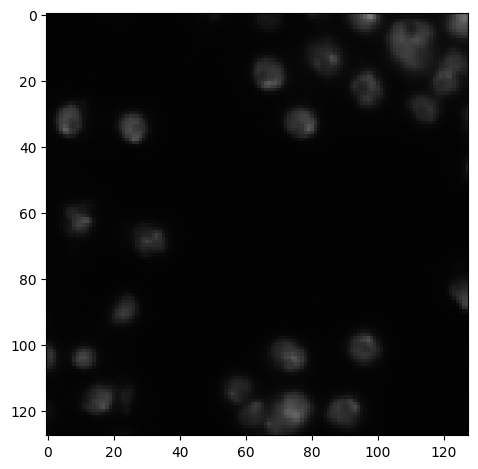

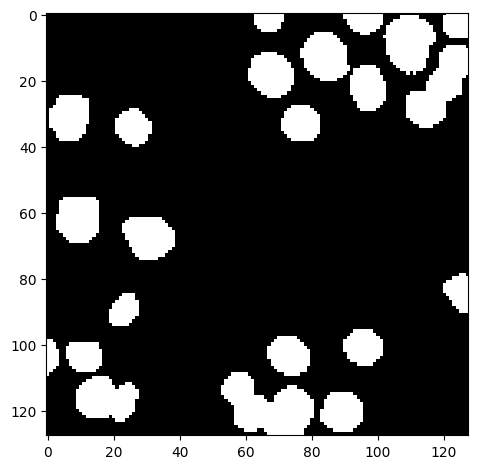

In [38]:
imshow(X_train[0])
plt.show()
imshow(Y_train[0])
plt.show()

In [18]:
# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    # print(img.dtype)
    if img.dtype != np.uint8:
        img = np.clip(img, 0, 255)  # Clip values
        img = img.astype(np.uint8)  # Convert to uint8
    X_test[n] = img

print('Done!')

Resizing test images


100%|██████████| 65/65 [00:01<00:00, 49.54it/s]

Done!


234

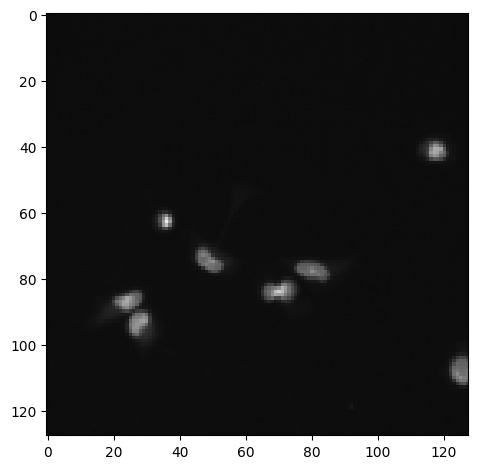

In [39]:
sizes_test[1]
imshow(X_test[1])
X_test[1].max()

418


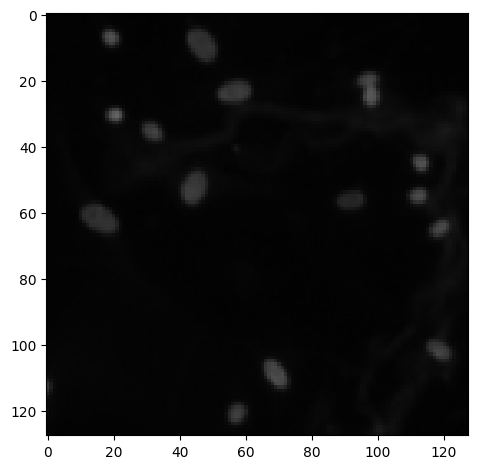

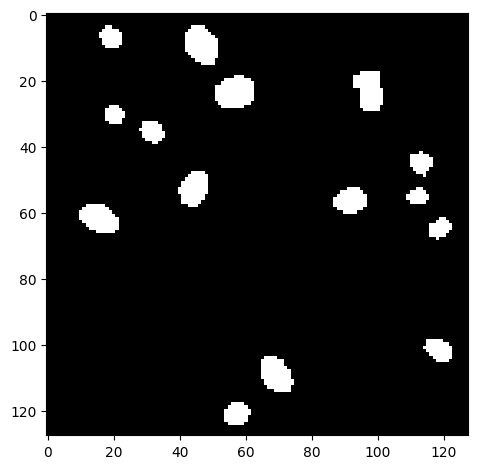

In [40]:
image_x = random.randint(0, len(train_ids))
print(image_x)

imshow(X_train[image_x])
plt.show()
imshow(np.squeeze(Y_train[image_x]))
plt.show()

In [41]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 128, 128,  │          0 │ input_layer_1[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │        448 │ lambda_1[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_19[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │      2,320 │ dropout_9[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_20[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │      4,640 │ max_pooling2d_4[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 64, 64,    │          0 │ conv2d_21[0][0]   │
│ (Dropout)           │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 64, 64,    │      9,248 │ dropout_10[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_22[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 32, 32,    │     18,496 │ max_pooling2d_5[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32, 32,    │          0 │ conv2d_23[0][0]   │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 32, 32,    │     36,928 │ dropout_11[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_24[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 16, 16,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 16, 16,    │          0 │ conv2d_25[0][0]   │
│ (Dropout)           │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 16, 16,    │    147,584 │ dropout_12[0][0]

 Total params: 1,941,105 (7.40 MB)

 Trainable params: 1,941,105 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
import datetime

In [44]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#Defining callbacks
# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='model_for_nuclei.keras', verbose=1, save_best_only=True),
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#     tf.keras.callbacks.TensorBoard(log_dir='logs')
    tensorboard_callback
]

In [45]:
# Clear any logs from previous runs
!rm -rf /kaggle/working/logs

In [46]:
results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - accuracy: 0.7137 - loss: 0.6548
Epoch 1: val_loss improved from inf to 0.46969, saving model to model_for_nuclei.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.7155 - loss: 0.6536 - val_accuracy: 0.8271 - val_loss: 0.4697
Epoch 2/25
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8260 - loss: 0.4161
Epoch 2: val_loss improved from 0.46969 to 0.24704, saving model to model_for_nuclei.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8271 - loss: 0.4125 - val_accuracy: 0.8987 - val_loss: 0.2470
Epoch 3/25
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9068 - loss: 0.2066
Epoch 3: val_loss improved from 0.24704 to 0.15471, saving model to model_for_nuclei.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9077 - loss: 0.2050 - val_accuracy: 0.9367 - val_loss: 0.1547
Epoch 4/25
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9457 - loss: 0.1350
Epoch 4: val_loss improved from 0.15471 

In [70]:
# type(results)
results.history

{'accuracy': [0.784195065498352,
  0.8479863405227661,
  0.9251365661621094,
  0.9488483667373657,
  0.955160915851593,
  0.9574512839317322,
  0.958954930305481,
  0.9614565372467041,
  0.9618232846260071,
  0.9628497362136841,
  0.9629354476928711,
  0.9622888565063477,
  0.964347243309021,
  0.9640823006629944,
  0.9649112820625305,
  0.9653699994087219,
  0.9669433236122131],
 'loss': [0.6093277931213379,
  0.3454512655735016,
  0.17679463326931,
  0.12925772368907928,
  0.11603794246912003,
  0.10956774652004242,
  0.1048390120267868,
  0.09971911460161209,
  0.09706314653158188,
  0.09585324674844742,
  0.09538379311561584,
  0.0964227244257927,
  0.09139639139175415,
  0.09158390760421753,
  0.08931180834770203,
  0.08924997597932816,
  0.08479070663452148],
 'val_accuracy': [0.827081024646759,
  0.8987326622009277,
  0.9366673827171326,
  0.945182204246521,
  0.9467463493347168,
  0.9475170373916626,
  0.9556310772895813,
  0.954710066318512,
  0.9574010968208313,
  0.957345545

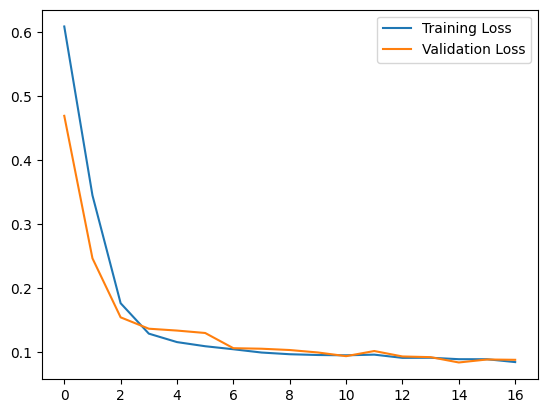

In [67]:
history = results.history
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

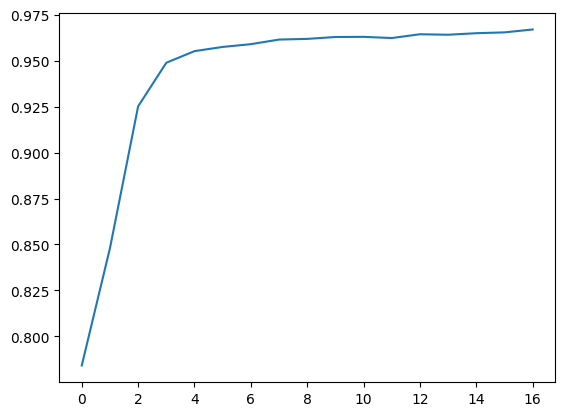

In [71]:
history = results.history
plt.plot(history['accuracy'], label='Accuracy')
plt.show()

In [88]:
model.input_shape

(None, 128, 128, 3)

In [103]:
idx = random.randint(0, len(X_train))
true_image = X_train[idx]
true_mask = np.squeeze(Y_train[idx])
# Add batch dimension
single_sample = np.expand_dims(X_train[idx], axis=0)
# Make prediction
predicted_mask = model.predict(single_sample)[0]
# print(predicted_mask)

predicted_mask = np.squeeze(predicted_mask)
# print(predicted_mask.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


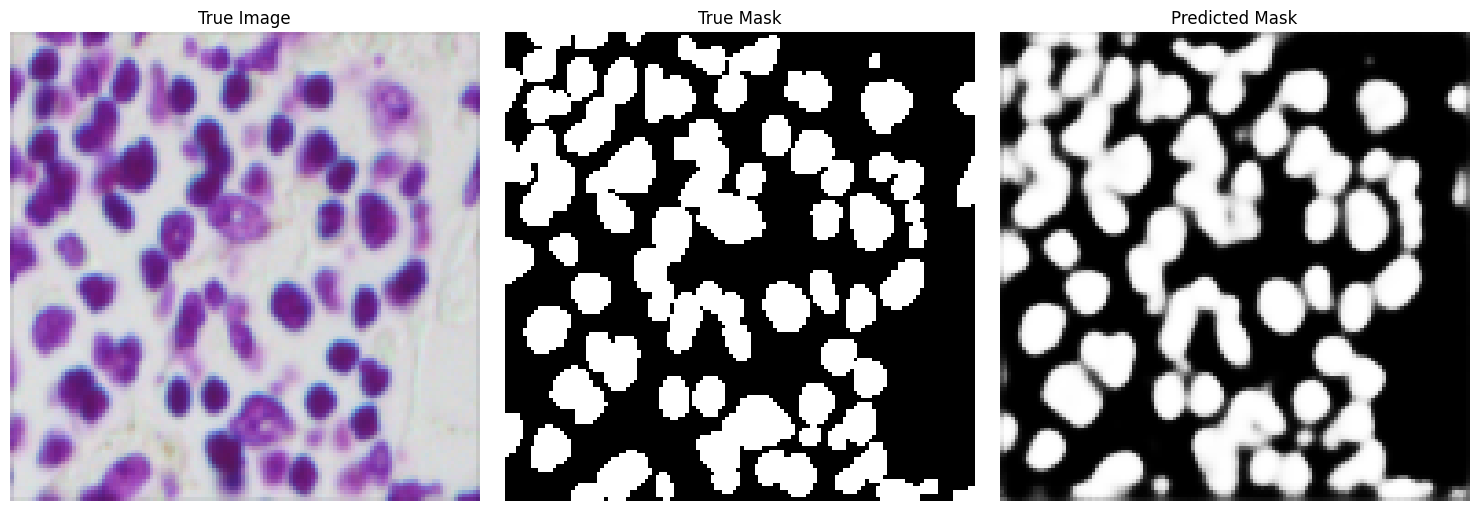

In [104]:
# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# True Image
axes[0].imshow(true_image)
axes[0].set_title('True Image')
axes[0].axis('off')

# True Mask
axes[1].imshow(true_mask, cmap='gray')
axes[1].set_title('True Mask')
axes[1].axis('off')

# Predicted Mask
axes[2].imshow(predicted_mask, cmap='gray')
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.tight_layout()
plt.show()